# IMPORT LIBRARY

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt #UNTUK PLOTTING NILAI LOSS DAN ACCURACY PADA HIST DI BAWAH

# CONNECTED TO GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# IMPORT DATA

In [ ]:
df = pd.read_csv ("/content/drive/MyDrive/pengembangan-ML-dicoding/Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# BUANG KOLOM YG TIDAK DIPERLUKAN MENGGUNAKAN FUNGSI drop()

In [ ]:
df = df.drop(columns='Id')

# LAKUKAN ONE HOT ENCODING UNTUK TIPE DATA KATEGORIKAL DG MENGGUNAKAN FUNGSI get_dummies()

In [ ]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


# BUANG KOLOM SPECIES DAN GABUNGKAN HASIL ONE HOT ENCODING

In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# KONVERSI DATAFRAME MENJADI NUMPY ARRAY

In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

# PISAHAKN ATRIBUT DAN LABEL

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

# NORMALIZATION DATA

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

# PISAHKAN DATA LATIH DAN DATA UJI

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

# BUAT MODEL JST DG 3 LAYER + ACTIVATION SOFTMAX

In [ ]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),

                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),]) #COCOK DIGUNAKAN UNTUK MULTICLASS CLASSIFICATION

# MENENTUKAN OPTIMAZER DAN LOSS FUNCTION

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy', #SANGAT COCOK UNTUK MULTICLASS CLASSIFICATION
              metrics=['accuracy'])

# FUNGSI FIT() DITAMPUNG KE DALAM HIST

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)


'''
dapat membuat plot dari akurasi dan loss model kita pada saat proses pelatihan

'''

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.0962 - accuracy: 0.3619
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0565 - accuracy: 0.6381
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0258 - accuracy: 0.6571
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9981 - accuracy: 0.6571
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9723 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9457 - accuracy: 0.6571
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9171 - accuracy: 0.6571
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8876 - accuracy: 0.6667
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8560 - accuracy: 0.6667
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8227 - accuracy: 0.6667
Epoch 11/100
4/4 [===========

# MENGUJI AKURASI PREDIKSI MODEL PADA DATA UJI

In [ ]:
model.evaluate(X_test, Y_test)
# elemen pertama adalah loss dan elemen kedua adalah akurasi

2/2 [==============================] - 0s 9ms/step - loss: 0.1315 - accuracy: 0.9111


[0.13151836395263672, 0.9111111164093018]

# PLOT LOSS

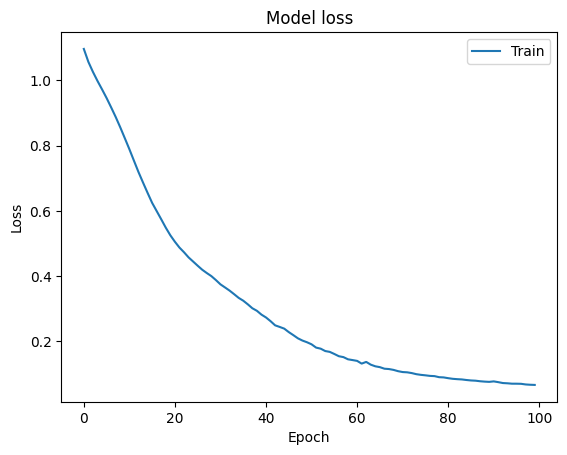

In [ ]:
plt.plot(hist.history['loss']) #HIST PADA SEBELUMNYA DIMANA FUNGSI FIT() DITAMPUNG
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# PLOT AKURASI

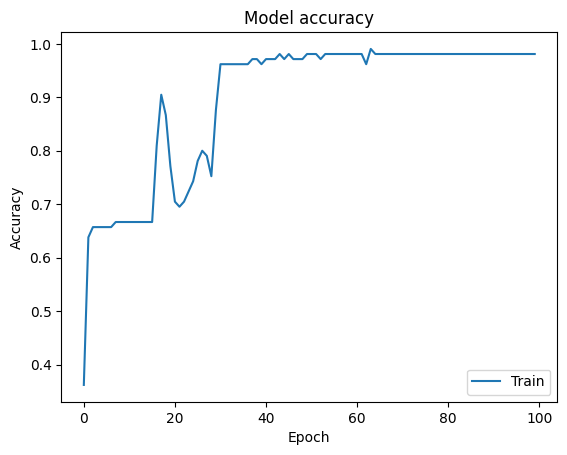

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Tujuan dibuatnya plot model loss dan akurasi adalah untuk mengetahui model tersebut UNDERFITTING ATAU OVERFITTING

Jika terjadi overfitting, maka gunakan fungsi dropout dg menambahkan layer tf.keras.layers.Dropout()

Fungsi CALLBACK membantu memberi tahu model agar berhenti melakukan pelatihan ketika sudah mencapai target tertentu. jadi lebih menghemat waktu eksekusi